### 생선 분류 
 - 데이터셋 : fish.csv.
 - 피쳐/특성 : Weight, Lenght
 - 타겟/ 라벨 : Species
 - 학습 방법 : 지도 학습 = > 분류
 - 학습 알고리즘 : 최근접이웃알고리즘

In [62]:
# [1] 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
DATA_file = '../data/fish.csv'

In [64]:
# 행 : Bream, Smelt   컬럼 : Species, Weight, Lenght => 0,1,2 
fishDF = pd.read_csv(DATA_file, usecols=[0,1,2])# 컬럼명도 가능
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [65]:
# mask로 원DF에서 사용DF추출 
mask = (fishDF['Species'] == "Bream")| (fishDF['Species'] == "Smelt")
twoDF = fishDF[mask]
twoDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [66]:
# twoDF의 인덱스 다시 설정
twoDF.reset_index(drop=True, inplace=True)
twoDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [67]:
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [68]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
new_cols = twoDF['Species'].replace({'Bream':0, 'Smelt':1})
twoDF['FCode'] = new_cols

C:\Users\KDP-23\AppData\Local\Temp\ipykernel_18588\3829503867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['FCode'] = new_cols


In [69]:
twoDF.head(1)

,Species,Weight,Length,FCode
0,Bream,242.0,25.4,0


### 2. 피쳐와 타겟 분리

In [70]:
features = twoDF[['Weight','Length']]
target = twoDF['FCode']
print(f'features: {features.shape}, {features.ndim}D')
print(f'target: {target.shape}, {target.ndim}D')

features: (49, 2), 2D
target: (49,), 1D


### 3. 데이터셋 준비 --> 학습용, 테스트용

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# train: test = 80:20 ===> test_size=0.2  또는 train_size = 0.8
# stratfy 메개변수 >> 분류인 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    stratify = target,
                                                    random_state=10)

In [73]:
# train : test 80:20체크
print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'x_test : {x_test.shape}, {x_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (39, 2), 2D
y_train : (39,), 1D
x_test : (10, 2), 2D
y_test : (10,), 1D


In [74]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [75]:
y_train.value_counts(), y_train.shape[0]

(FCode
 0    28
 1    11
 Name: count, dtype: int64,
 39)

In [76]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

In [77]:
y_test.value_counts(), y_test.shape[0]

(FCode
 0    7
 1    3
 Name: count, dtype: int64,
 10)

#### 3-1 피쳐 스케일링

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [80]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(x_train)

MinMaxScaler()

In [81]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [82]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 변환
x_train_Scaler = mmScaler.transform(x_train)
x_train_Scaler.shape

(39, 2)

In [83]:
x_test_Scaler = mmScaler.transform(x_test)
x_test_Scaler.shape , x_test_Scaler.min(), x_test_Scaler.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

### 4 훈련학습 진행
- 학습알고리즘 인스턴스 생성
- 학습 진행  

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [86]:
# 학습진행 ==>  학습용 데이터셋
model.fit(x_train_Scaler, y_train)

KNeighborsClassifier()

In [87]:
# 학습 후 모델 파라미터
model.classes_,model.n_samples_fit_
#  model.feature_names_in_,  <== ndarray일 경우 컬럼명 X

(array([0, 1], dtype=int64), 39)

In [88]:
model.score(x_test_Scaler, y_test)

1.0

#### 6. 예측 하기  == > 학습/ 훈련과 테스트에 사용되지 않은 데이터 사용
 - 주의 : 입력 데이터 ==> 2D
 

In [89]:
new_data =pd.DataFrame([[413,27.8]], columns=['Weight', 'Length'])
new_data


,Weight,Length
0,413,27.8


In [90]:
new_data_mmScaled = mmScaler.transform(new_data)
new_data_mmScaled

array([[0.40904057, 0.57692308]])

In [91]:
# 임의의 새로운 데이터의 예측
distance, idx = model.kneighbors(new_data_mmScaled)

In [92]:
### 최근접한 k개 데이터 찾기
distance, idx = model.kneighbors(new_data_mmScaled)

In [93]:
distance

array([[0.04209753, 0.06334927, 0.07138647, 0.07421737, 0.07974703]])

In [94]:
neighbors = idx.reshape(-1).tolist()
neighbors

[25, 22, 21, 0, 6]

In [95]:
x_train_Scaler[neighbors]

array([[0.42615524, 0.61538462],
       [0.35870331, 0.61538462],
       [0.44629014, 0.63782051],
       [0.38588543, 0.6474359 ],
       [0.44629014, 0.6474359 ]])

In [96]:
k_weight = x_train_Scaler[neighbors][:,0]
k_length = x_train_Scaler[neighbors][:,1]
print(new_data_mmScaled)
print(k_weight, k_length, sep='\n')

[[0.40904057 0.57692308]]
[0.42615524 0.35870331 0.44629014 0.38588543 0.44629014]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359 ]


In [97]:
x_train_Scaler[neighbors][0], x_train_Scaler[neighbors][1] 

(array([0.42615524, 0.61538462]), array([0.35870331, 0.61538462]))

In [98]:
new_data_mmScaled[0,0], new_data_mmScaled[0,1]

(0.4090405718312696, 0.5769230769230771)

In [99]:
x_train_Scaler[:,0], x_train_Scaler[:,1]

(array([3.85885432e-01, 3.12091010e-03, 2.85210913e-01, 5.53709856e-03,
        9.54696466e-01, 1.32890365e-02, 4.46290144e-01, 1.00000000e+00,
        0.00000000e+00, 6.97976442e-01, 4.71458774e-01, 6.47639183e-01,
        4.96627404e-01, 3.02023558e-04, 6.82875264e-01, 3.12091010e-03,
        7.18111346e-01, 3.35548173e-01, 9.24494111e-01, 3.02023558e-03,
        6.74519279e-03, 4.46290144e-01, 3.58703312e-01, 6.07369375e-01,
        6.77841538e-01, 4.26155240e-01, 6.97976442e-01, 3.22158462e-03,
        2.01349039e-03, 4.96627404e-01, 5.72133293e-01, 6.17436827e-01,
        8.05396154e-04, 5.97301923e-01, 9.74831370e-01, 9.19460385e-01,
        4.96627404e-01, 3.35548173e-01, 9.49662740e-01]),
 array([0.6474359 , 0.07051282, 0.52884615, 0.1025641 , 0.91987179,
        0.16666667, 0.6474359 , 0.87179487, 0.        , 0.74358974,
        0.67948718, 0.75961538, 0.69551282, 0.02564103, 0.77564103,
        0.04487179, 0.80769231, 0.53525641, 0.95192308, 0.03846154,
        0.08333333, 0.

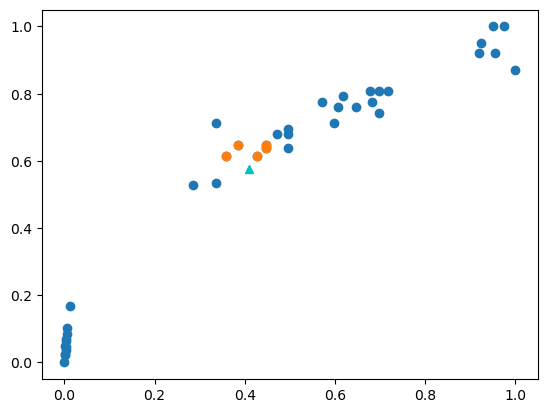

In [100]:
### 시각화
# 도미 빙어 에 대한 시각화 >> 2개 피쳐 weight, length로 도미 빙어 분류 가능함
plt.scatter(x_train_Scaler[:,0], x_train_Scaler[:,1]) 
# plt.scatter(twoDF.loc[35: ,'Weight'], twoDF.loc[35: ,'Length'])
plt.plot(new_data_mmScaled[0,0], new_data_mmScaled[0,1], 'c^')
plt.scatter(k_weight,k_length)
plt.show()

ml2에서 보는 것과 다르게 스케일링을 진행 후 진행하는것이 정확도가 올라갈 확률이 있다.